# MY_TRC Comparisons

In [63]:
#import copy
import glob
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from __future__ import division
from __future__ import print_function
from mpl_toolkits.basemap import cm
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
% matplotlib inline

In [64]:
def draw_temporal(Ba):
    Ba_mean=np.mean(np.mean(Ba[:, 0, :, :], 2), 1)
    fig = plt.figure(figsize=(10, 5))
    ax = fig.gca(); ax.grid()
    ax.plot(Ba_mean, 'k-', linewidth=3)

In [65]:
def draw_Ba(Ba, nav_lon, nav_lat):
    fig = plt.figure(figsize=(20, 20))
    ax1 = plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
    ax2 = plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
    #
    parallels = np.arange(-90, 90, 15)
    meridians = np.arange(0, 360, 60)
    #
    proj=Basemap(projection='npstere', resolution='c', boundinglat=60, lon_0=90, round=True, ax=ax1)
    proj.drawparallels(parallels, labels=[1, 1, 1, 1], fontsize=10, latmax=90)
    proj.drawmeridians(meridians, labels=[1, 1, 1, 1], fontsize=10, latmax=90)
    proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
    x, y=proj(nav_lon, nav_lat)
    CS=proj.pcolor(x, y, Ba[0, 0, :, :], vmin=0, vmax=1e2, cmap=plt.cm.gist_ncar_r)
    ax1.set_title('(a) First year January', fontsize=12, fontweight='bold', y=1.025)
    #
    proj=Basemap(projection='npstere', resolution='c', boundinglat=60, lon_0=90, round=True, ax=ax2)
    proj.drawparallels(parallels, labels=[1, 1, 1, 1], fontsize=10, latmax=90)
    proj.drawmeridians(meridians, labels=[1, 1, 1, 1], fontsize=10, latmax=90)
    proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
    CS=proj.pcolor(x, y, Ba[10, 0, :, :], vmin=0, vmax=1e2, cmap=plt.cm.gist_ncar_r)
    ax2.set_title('(b) First year November', fontsize=12, fontweight='bold', y=1.025)
    #
    cax  = fig.add_axes([0.75, 0.25, 0.02, 0.5])
    CBar = fig.colorbar(CS, cax=cax, orientation='vertical')
    CBar.set_label('Ba concentration ( 1E6 mol/L )', fontsize=12)
    CBar.ax.tick_params(axis='x', length=20)

# Content
1. [**MY_TRC EXP01**](#MY_TRC-EXP01)
1. [**MY_TRC EXP02**](#MY_TRC-EXP02)

# MY_TRC EXP01

```frotran
trn(:, :, 1, jpmyt1) = Ba(:,:)
```

In [66]:
ptrc_filename=glob.glob('_data/EXP01*.nc')
ptrc_obj = nc.Dataset(ptrc_filename[0])
Ba=ptrc_obj.variables['Ba'][:]
latitude=ptrc_obj.variables['nav_lat'][:]
longitude=ptrc_obj.variables['nav_lon'][:]

In [67]:
Ba.max()

3.819657e+08

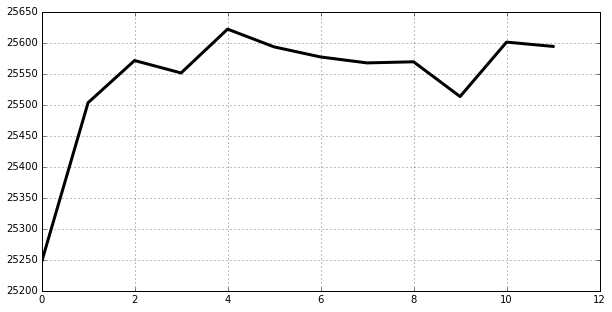

In [68]:
draw_temporal(Ba)

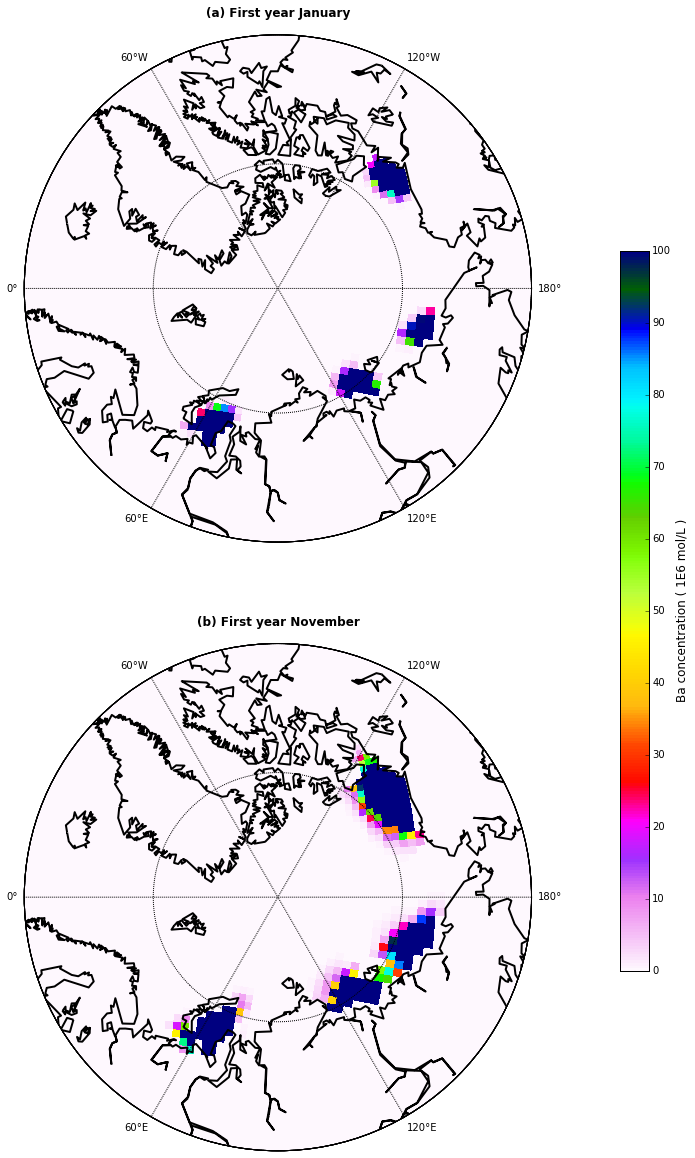

In [69]:
draw_Ba(Ba, longitude, latitude)

# MY_TRC EXP02

```frotran
trn(:, :, 1, jpmyt1) = Ba(:,:)*rnf(:, :)/gdept(1, :, :)
```

In [70]:
ptrc_filename=glob.glob('_data/EXP02*.nc')
ptrc_obj = nc.Dataset(ptrc_filename[0])
Ba=ptrc_obj.variables['Ba'][:]
latitude=ptrc_obj.variables['nav_lat'][:]
longitude=ptrc_obj.variables['nav_lon'][:]

In [71]:
Ba.max()

10447290.0

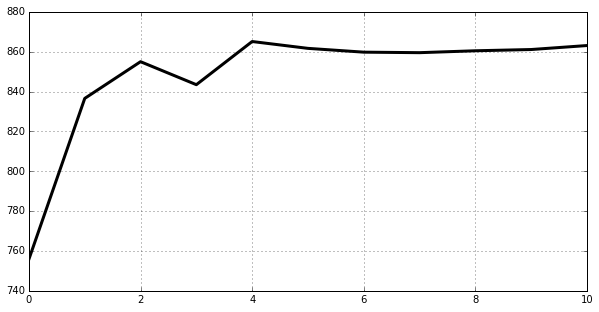

In [72]:
draw_temporal(Ba)

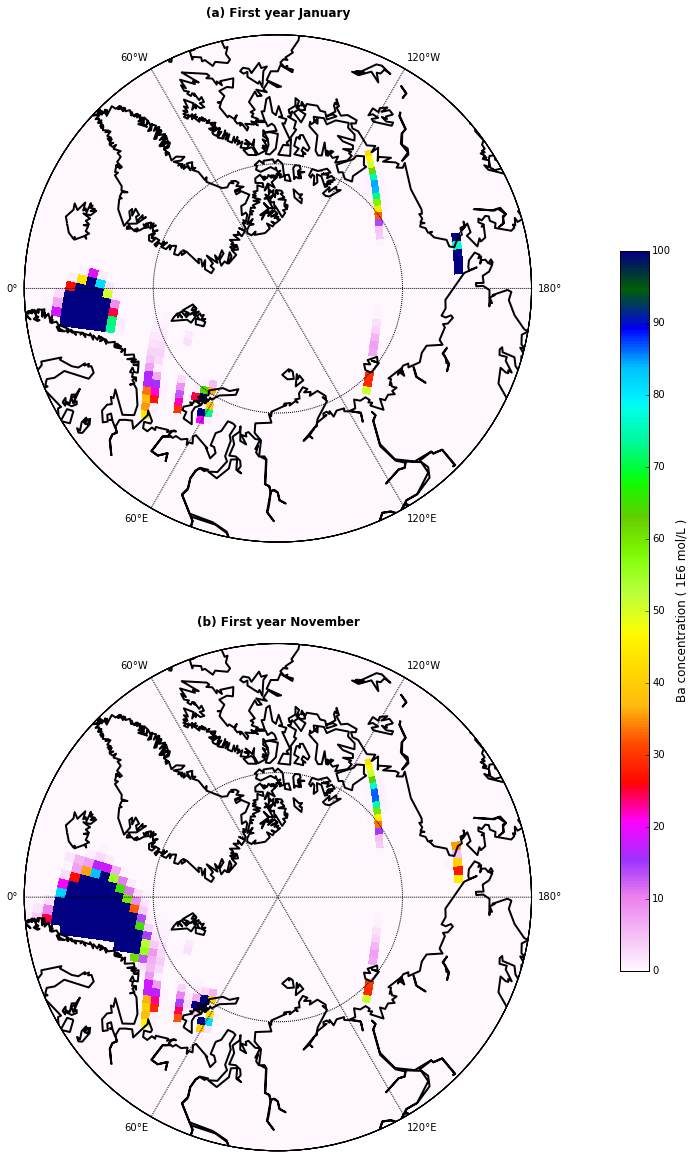

In [73]:
draw_Ba(Ba, longitude, latitude)